<a href="https://colab.research.google.com/github/Elmir22/Data-science-ML-models-/blob/main/covid_19_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
data = pd.read_csv('/content/covid_19_data.csv')

In [59]:
data

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,infected,Day
0,1,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1.0,0
1,2,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,14.0,0
2,3,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,6.0,0
3,4,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1.0,0
4,5,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
6717,6718,2020-03-18,NaN,Guernsey,2020-03-17T18:33:03,0.0,0.0,0.0,0.0,56
6718,6719,2020-03-18,NaN,Jersey,2020-03-17T18:33:03,0.0,0.0,0.0,0.0,56
6719,6720,2020-03-18,NaN,Puerto Rico,2020-03-17T16:13:14,0.0,0.0,0.0,0.0,56
6720,6721,2020-03-18,NaN,Republic of the Congo,2020-03-17T21:33:03,0.0,0.0,0.0,0.0,56


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6722 entries, 0 to 6721
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              6722 non-null   int64  
 1   ObservationDate  6722 non-null   object 
 2   Province/State   3953 non-null   object 
 3   Country/Region   6722 non-null   object 
 4   Last Update      6722 non-null   object 
 5   Confirmed        6722 non-null   float64
 6   Deaths           6722 non-null   float64
 7   Recovered        6722 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 420.3+ KB


In [7]:
data.describe()

,SNo,Confirmed,Deaths,Recovered
count,6722.000000,6722.000000,6722.000000,6722.000000
mean,3361.500000,601.195924,19.855846,226.341267
std,1940.618587,4896.332140,204.486922,2556.035202
min,1.000000,0.000000,0.000000,0.000000
25%,1681.250000,2.000000,0.000000,0.000000
50%,3361.500000,13.000000,0.000000,0.000000
75%,5041.750000,108.000000,1.000000,11.000000
max,6722.000000,67800.000000,3122.000000,56927.000000


In [8]:
data.isnull().sum()

,0
SNo,0
ObservationDate,0
Province/State,2769
Country/Region,0
Last Update,0
Confirmed,0
Deaths,0
Recovered,0


In [11]:
data['infected'] = data['Confirmed'] - data['Recovered'] - data['Deaths']

In [15]:
data['ObservationDate'] = pd.to_datetime(data['ObservationDate'])

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6722 entries, 0 to 6721
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SNo              6722 non-null   int64         
 1   ObservationDate  6722 non-null   datetime64[ns]
 2   Province/State   3953 non-null   object        
 3   Country/Region   6722 non-null   object        
 4   Last Update      6722 non-null   object        
 5   Confirmed        6722 non-null   float64       
 6   Deaths           6722 non-null   float64       
 7   Recovered        6722 non-null   float64       
 8   infected         6722 non-null   float64       
 9   Day              6722 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 525.3+ KB


In [37]:
data['Day'] = (data['ObservationDate'] - data['ObservationDate'].min()).dt.days
data['Day'] = pd.to_numeric(data['Day'])

In [38]:
data.iloc[30:50]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,infected,Day
30,31,2020-01-22,Tibet,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,0.0,0
31,32,2020-01-22,Washington,US,1/22/2020 17:00,1.0,0.0,0.0,1.0,0
32,33,2020-01-22,Xinjiang,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,0.0,0
33,34,2020-01-22,Yunnan,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,1.0,0
34,35,2020-01-22,Zhejiang,Mainland China,1/22/2020 17:00,10.0,0.0,0.0,10.0,0
35,36,2020-01-22,NaN,Japan,1/22/2020 17:00,2.0,0.0,0.0,2.0,0
36,37,2020-01-22,NaN,Thailand,1/22/2020 17:00,2.0,0.0,0.0,2.0,0
37,38,2020-01-22,NaN,South Korea,1/22/2020 17:00,1.0,0.0,0.0,1.0,0
38,39,2020-01-23,Anhui,Mainland China,1/23/20 17:00,9.0,0.0,0.0,9.0,1
39,40,2020-01-23,Beijing,Mainland China,1/23/20 17:00,22.0,0.0,0.0,22.0,1


In [44]:
daily_data = data.groupby('Day').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum',
    'infected': 'sum',
    # Add other numeric columns you want to sum here
}).reset_index()

In [45]:
daily_data

,Day,Confirmed,Deaths,Recovered,infected
0,0,555.0,17.0,28.0,510.0
1,1,653.0,18.0,30.0,605.0
2,2,941.0,26.0,36.0,879.0
3,3,1438.0,42.0,39.0,1357.0
4,4,2118.0,56.0,52.0,2010.0
5,5,2927.0,82.0,61.0,2784.0
6,6,5578.0,131.0,107.0,5340.0
7,7,6165.0,133.0,126.0,5906.0
8,8,8235.0,171.0,143.0,7921.0
9,9,9925.0,213.0,222.0,9490.0


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [49]:
# Define features (X) and target variables (y)
X = daily_data[['Day']]
y_confirmed = daily_data['Confirmed']
y_infected = daily_data['infected']
y_recovered = daily_data['Recovered']
y_deaths = daily_data['Deaths']

In [50]:
#train test spit
X_train, X_test, y_confirmed_train, y_confirmed_test = train_test_split(X, y_confirmed, test_size=0.2, random_state=42)

In [51]:
X_train

,Day
43,43
26,26
8,8
17,17
6,6
4,4
40,40
19,19
36,36
48,48


In [52]:
y_confirmed_train

,Confirmed
43,97886.0
26,73260.0
8,8235.0
17,37121.0
6,5578.0
4,2118.0
40,90309.0
19,42763.0
36,82756.0
48,118582.0


In [53]:
# Train a Linear Regression Model for Confirmed Cases
model_confirmed = LinearRegression()
model_confirmed.fit(X_train, y_confirmed_train)

LinearRegression()

In [54]:
# Evaluate model performance
y_confirmed_pred = model_confirmed.predict(X_test)
print(f"Mean Squared Error for Confirmed Cases: {mean_squared_error(y_confirmed_test, y_confirmed_pred):.2f}")

Mean Squared Error for Confirmed Cases: 242129129.57


In [55]:
# Repeat for Infected, Recovered, and Death cases
models = {}
predictions = {}
for target, y in zip(['Infected', 'Recovered', 'Deaths'], [y_infected, y_recovered, y_deaths]):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    models[target] = model
    predictions[target] = model.predict(X_test)


In [60]:
# Ensure future_days is a DataFrame with the same column name as training data
X_train = daily_data[['Day']]
future_days = pd.DataFrame({'Day': np.arange(daily_data['Day'].max() + 1, daily_data['Day'].max() + 8)})

# Predict for the next 7 days using the correct format
future_confirmed = model_confirmed.predict(future_days)
future_infected = models['Infected'].predict(future_days)
future_recovered = models['Recovered'].predict(future_days)
future_deaths = models['Deaths'].predict(future_days)

In [61]:
# Create a DataFrame for Predictions
future_dates = pd.date_range(start=data['ObservationDate'].max() + pd.Timedelta(days=1), periods=7)
predictions_df = pd.DataFrame({
    'Date': future_dates,
    'Confirmed': future_confirmed,
    'Infected': future_infected,
    'Recovered': future_recovered,
    'Deaths': future_deaths
})

print("\nPredictions for the next 7 days:")
print(predictions_df)


Predictions for the next 7 days:
        Date      Confirmed      Infected     Recovered       Deaths
0 2020-03-19  158321.357721  78536.008591  74007.700962  5777.648168
1 2020-03-20  161357.940017  79803.359800  75656.975190  5897.605027
2 2020-03-21  164394.522312  81070.711009  77306.249417  6017.561886
3 2020-03-22  167431.104607  82338.062218  78955.523645  6137.518744
4 2020-03-23  170467.686903  83605.413427  80604.797872  6257.475603
5 2020-03-24  173504.269198  84872.764636  82254.072100  6377.432462
6 2020-03-25  176540.851494  86140.115845  83903.346328  6497.389321


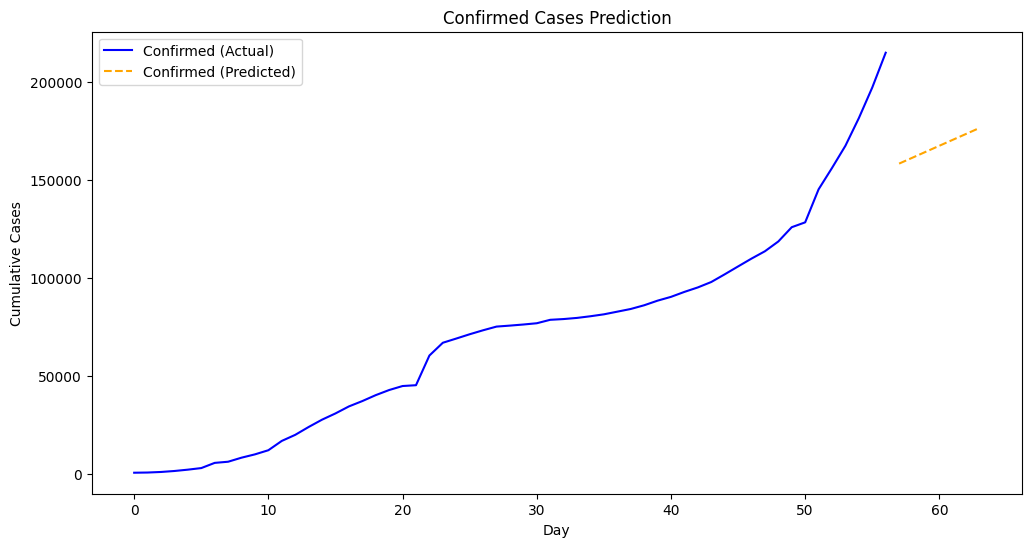

In [67]:
# Visualization
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Day'], y_confirmed, label='Confirmed (Actual)', color='blue')
plt.plot(future_days['Day'], future_confirmed, label='Confirmed (Predicted)', color='orange', linestyle='--' ) # Access the 'Day' column using bracket notation
plt.xlabel("Day")
plt.ylabel("Cumulative Cases")
plt.title("Confirmed Cases Prediction")
plt.legend()
plt.show()

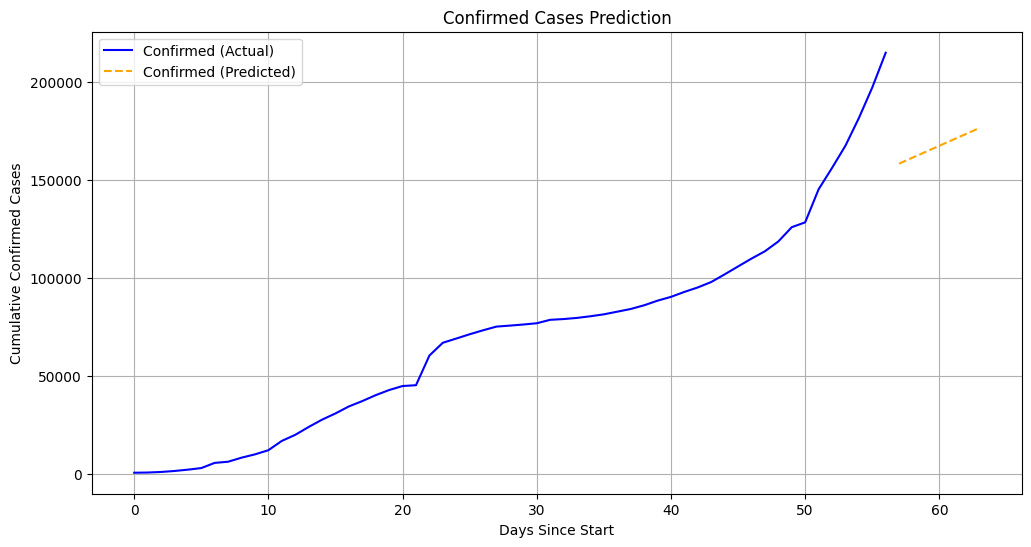

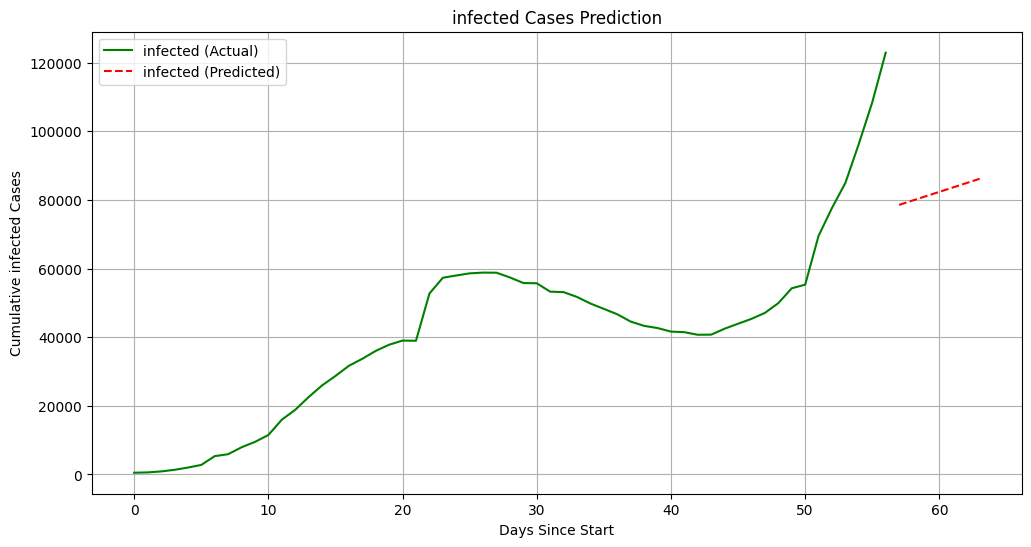

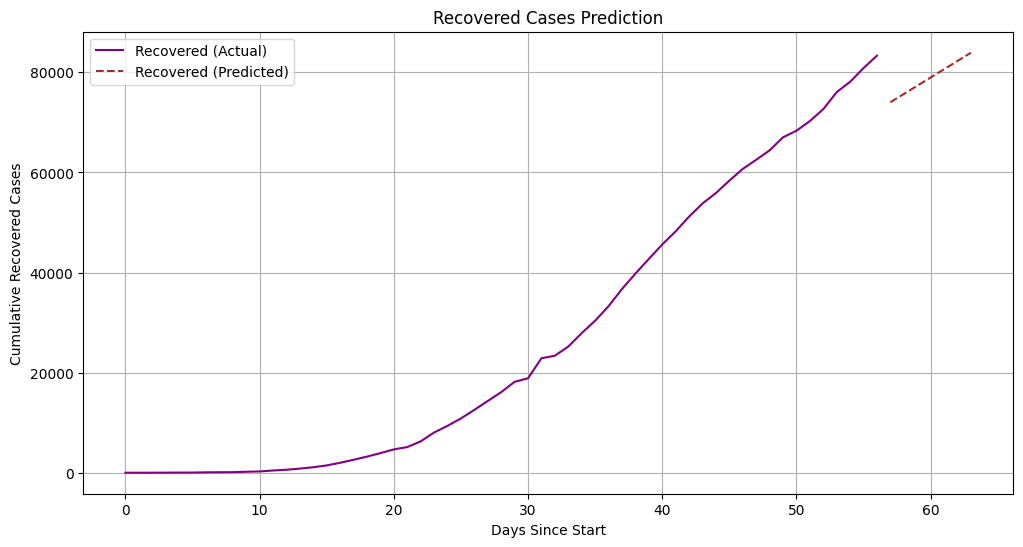

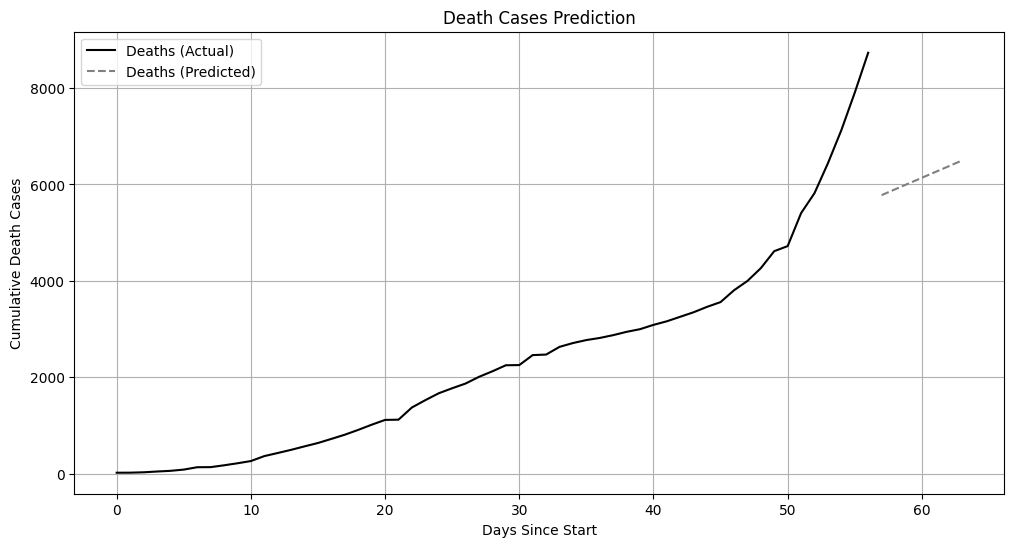

In [64]:
# Plotting Confirmed Cases
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Day'], daily_data['Confirmed'], label='Confirmed (Actual)', color='blue')
plt.plot(future_days['Day'], future_confirmed, label='Confirmed (Predicted)', color='orange', linestyle='--')
plt.xlabel("Days Since Start")
plt.ylabel("Cumulative Confirmed Cases")
plt.title("Confirmed Cases Prediction")
plt.legend()
plt.grid()
plt.show()

# Plotting infected Cases
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Day'], daily_data['infected'], label='infected (Actual)', color='green')
plt.plot(future_days['Day'], future_infected, label='infected (Predicted)', color='red', linestyle='--')
plt.xlabel("Days Since Start")
plt.ylabel("Cumulative infected Cases")
plt.title("infected Cases Prediction")
plt.legend()
plt.grid()
plt.show()

# Plotting Recovered Cases
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Day'], daily_data['Recovered'], label='Recovered (Actual)', color='purple')
plt.plot(future_days['Day'], future_recovered, label='Recovered (Predicted)', color='brown', linestyle='--')
plt.xlabel("Days Since Start")
plt.ylabel("Cumulative Recovered Cases")
plt.title("Recovered Cases Prediction")
plt.legend()
plt.grid()
plt.show()

# Plotting Death Cases
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Day'], daily_data['Deaths'], label='Deaths (Actual)', color='black')
plt.plot(future_days['Day'], future_deaths, label='Deaths (Predicted)', color='gray', linestyle='--')
plt.xlabel("Days Since Start")
plt.ylabel("Cumulative Death Cases")
plt.title("Death Cases Prediction")
plt.legend()
plt.grid()
plt.show()
